📥 Downloading dataset from GitHub...
✅ Dataset loaded successfully from URL!
Shape: (2341633, 17)
Columns: Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'duration',
       'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts',
       'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'label', 'type'],
      dtype='object')

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    159276
           1       1.00      1.00      1.00    309051

    accuracy                           1.00    468327
   macro avg       1.00      1.00      1.00    468327
weighted avg       1.00      1.00      1.00    468327


🔢 Confusion Matrix:
 [[159276      0]
 [     0 309051]]


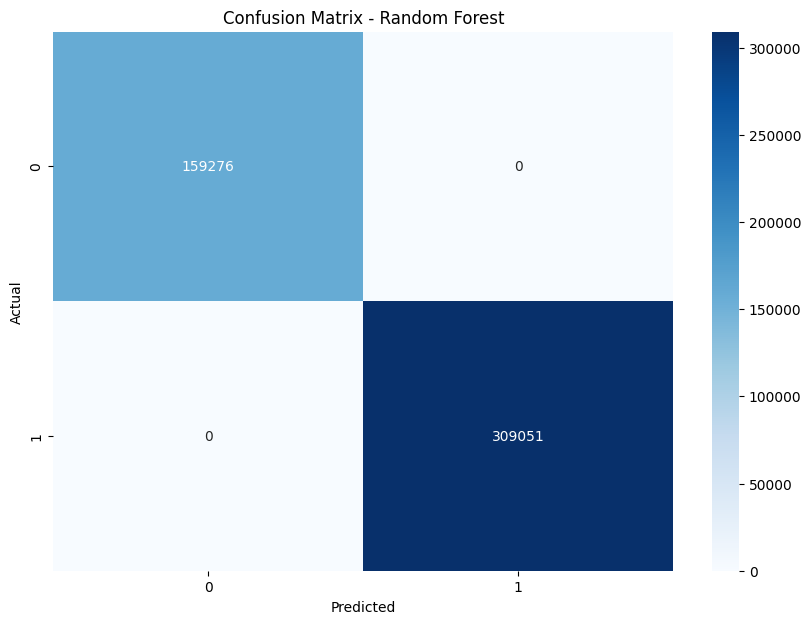

In [2]:
# -----------------------
# 🔹 IMPORT LIBRARIES
# -----------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# 🔹 LOAD DATASET FROM GITHUB URL
# -----------------------
url = "https://media.githubusercontent.com/media/TheArchitect2000/AI-CloudSec-System/refs/heads/dev/Step1-Datasets-Feature-Engineering/team11_TON_IoT_unsw_edu_au_cleaned.csv"

print("📥 Downloading dataset from GitHub...")
df = pd.read_csv(url)
print("✅ Dataset loaded successfully from URL!")
print("Shape:", df.shape)
print("Columns:", df.columns)

# -----------------------
# 🔹 SET TARGET COLUMN
# -----------------------
# Change if your dataset has a different label column name
target_col = "label"  

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found. Available columns: {df.columns.tolist()}")

# -----------------------
# 🔹 SPLIT FEATURES AND TARGET
# -----------------------
X = df.drop(columns=[target_col])
y = df[target_col]

# -----------------------
# 🔹 DROP IDENTIFIER COLUMNS IF PRESENT
# -----------------------
X = X.drop(columns=["Flow ID", "Source IP", "Destination IP", "Timestamp"], errors="ignore")

# -----------------------
# 🔹 CONVERT OBJECT COLUMNS TO NUMERIC
# -----------------------
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = pd.factorize(X[col])[0]

# -----------------------
# 🔹 ENCODE TARGET LABELS
# -----------------------
le = LabelEncoder()
y = le.fit_transform(y)

# -----------------------
# 🔹 TRAIN-TEST SPLIT
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------
# 🔹 SCALE FEATURES
# -----------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------
# 🔹 TRAIN RANDOM FOREST
# -----------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

# -----------------------
# 🔹 PREDICTION & EVALUATION
# -----------------------
y_pred = rf.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))

# 🧠 FIXED: Convert numeric labels to string before printing
class_labels = [str(c) for c in np.unique(y_test)]

print("\n📊 Classification Report:\n",
      classification_report(y_test, y_pred, target_names=class_labels))

print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------
# 🔹 CONFUSION MATRIX VISUALIZATION
# -----------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
